# RAG VIsual Grounded Stroy Generation

## VPN Setting

In [1]:

import os, requests

# os.environ["https_proxy"]="https://127.0.0.1:7890"
# os.environ["http_proxy"]="http://127.0.0.1:7890"
# os.environ["HTTPS_proxy"]="https://127.0.0.1:7890"
# os.environ["HTTP_proxy"]="http://127.0.0.1:7890"

os.environ["https_proxy"]="http://192.168.0.107:7890"
os.environ["http_proxy"]="http://192.168.0.107:7890"
os.environ["HTTPS_proxy"]="http://192.168.0.107:7890"
os.environ["HTTP_proxy"]="http://192.168.0.107:7890"

print(requests.get("https://google.com"))

<Response [200]>


## Environment

In [2]:
!pip install tqdm numpy pandas matplotlib openai datasets


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:

import os
import math
from collections import defaultdict
import requests
from PIL import Image
from io import BytesIO
import base64

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openai
from datasets import load_dataset


/root/miniconda3/envs/vgsg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:

# OpenAI API Key
# api_key = "YOUR_OPENAI_API_KEY" # Replace this with your real API key
openai.api_key = api_key

## Data Loading

In [6]:
dataset=load_dataset("tonyhong/vwp")
val_data=pd.DataFrame(dataset['val'])
test_data=pd.DataFrame(dataset['test'])
train_data=pd.DataFrame(dataset['train'])

In [7]:
val_data.shape, test_data.shape, train_data.shape

((849, 38), (586, 38), (11778, 38))

In [8]:
val_data[:7]

scene_full_id                                              link0  \
0  tt0047396_0010_0  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
1  tt0047396_0010_0  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
2  tt0047396_0010_0  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
3  tt0047396_0010_0  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
4  tt0047396_0010_0  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
5  tt0119822_0024_0  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
6  tt0119822_0024_0  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   

                                               link1  \
0  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
1  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
2  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
3  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
4  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
5  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
6  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   

                                               link2  \
0  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
1  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
2  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
3  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
4  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
5  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
6  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   

                                               link3  \
0  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
1  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
2  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
3  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
4  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
5  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
6  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   

                                               link4  \
0  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
1  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
2  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
3  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
4  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
5  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
6  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   

                                               link5  \
0                                               None   
1  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
2                                               None   
3                                               None   
4                                               None   
5                                               None   
6                                               None   

                                               link6  \
0                                               None   
1  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...   
2                                               None   
3                                               None   
4                                               None   
5                                               None   
6                                               None   

                                               link7 link8  ...  \
0                                               None  None  ...   
1  https://datasets.d2.mpi-inf.mpg.de/xhong/VST/a...  None  ...   
2                                               None  None  ...   
3                                               None  None  ...   
4                                               None  None  ...   
5                                               None  None  ...   
6                                               None  None  ...   

                               text7 text8 text9  \
0                               None  None  None   
1  Raymond stands at his front door.  None  None   
2                         

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
val_data[:7]['img_id_list']

0                                                                ['tt0047396_0667_0', 'tt0047396_0668_0', 'tt0047396_0671_1', 'tt0047396_0672_0', 'tt0047396_0693_0']
1    ['tt0047396_0667_0', 'tt0047396_0668_0', 'tt0047396_0669_0', 'tt0047396_0670_0', 'tt0047396_0684_0', 'tt0047396_0687_0', 'tt0047396_0688_0', 'tt0047396_0693_0']
2                                                                ['tt0047396_0668_0', 'tt0047396_0669_0', 'tt0047396_0670_0', 'tt0047396_0671_1', 'tt0047396_0672_0']
3                                                                ['tt0047396_0667_0', 'tt0047396_0668_0', 'tt0047396_0671_1', 'tt0047396_0672_0', 'tt0047396_0693_0']
4                                                                ['tt0047396_0667_0', 'tt0047396_0669_0', 'tt0047396_0671_1', 'tt0047396_0687_0', 'tt0047396_0693_0']
5                                                                ['tt0119822_1277_0', 'tt0119822_1278_1', 'tt0119822_1282_2', 'tt0119822_1283_1', 'tt0119822_1284_2']
6   

In [23]:
val_data[:7]['scene_full_id']

0    tt0047396_0010_0
1    tt0047396_0010_0
2    tt0047396_0010_0
3    tt0047396_0010_0
4    tt0047396_0010_0
5    tt0119822_0024_0
6    tt0119822_0024_0
Name: scene_full_id, dtype: object

In [15]:
val_data.keys()

Index(['scene_full_id', 'link0', 'link1', 'link2', 'link3', 'link4', 'link5',
       'link6', 'link7', 'link8', 'link9', 'char0', 'char1', 'char2', 'char3',
       'char4', 'char0_url', 'char1_url', 'char2_url', 'char3_url',
       'char4_url', 'text0', 'text1', 'text2', 'text3', 'text4', 'text5',
       'text6', 'text7', 'text8', 'text9', 'img_id_list', 'story', 'sep_story',
       'anonymised_story', 'split', 'imdb_id', 'story_id'],
      dtype='object')

## Similarity Retriever

In [11]:

import glob
import os
import sys
from functools import reduce

from PIL import Image


def get_image(image_path):
    if image_path[:5]!="https":
        img=Image.open(image_path)

    else:
        response=requests.get(image_path)
        img=Image.open(BytesIO(response.content))

    return img


def image_hash(image1, image2):
    h=avhash(image1)
    f=avhash(image2)

    return hamming(f, h)


def avhash(im):
    if not isinstance(im, Image.Image):
        im = Image.open(im)

    im = im.resize((8, 8), Image.ANTIALIAS).convert('L')
    avg = reduce(lambda x, y: x + y, im.getdata()) / 64.

    tmp=enumerate(map(lambda i: 0 if i < avg else 1, im.getdata()))
    return reduce(lambda x, tuple_arg: x | (tuple_arg[1] << tuple_arg[0]), tmp, 0)

    # return reduce(lambda x, (y, z): x | (z << y),
    #               enumerate(map(lambda i: 0 if i < avg else 1, im.getdata())),
    #               0)


def hamming(h1, h2):
    h, d = 0, h1 ^ h2
    while d:
        h += 1
        d &= d - 1

    return h



In [12]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
embed=tokenizer.encode("hello")
print(embed)
embed_tensor=torch.Tensor(embed)
embed_tensor_padded=torch.nn.functional.pad(embed_tensor, (0, 510))
print(embed_tensor.shape)
print(embed_tensor_padded.shape)

[21820, 1]
torch.Size([2])
torch.Size([512])


/root/miniconda3/envs/vgsg/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
# Load model directly
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
MAX_LENGTH=768

def preprocess_labelled_data(data):
    
    img_li=[]
    story_li=[]; ano_story_li=[]; ano_embed_story_li=[]

    img_id_dic={}; img_sent_dic={}
    
    index_img_dic={}
    index_sent_dic={}
    index_story_dic={}
    index_ano_story_dic={}
    index_ano_embed_dic={}
    
    # IMG_PRE_PATH='INLG/vgsg/images'

    for story_id in data.index:
        scene_full_id = data.loc[story_id, 'scene_full_id']
        img_id_li = eval(data.loc[story_id, 'img_id_list'])

        # image_paths = [os.path.join(IMG_PRE_PATH, img_id+'.jpg') for img_id in img_id_li]
        human_story = data.loc[story_id, 'story']
        ano_story = data.loc[story_id, 'anonymised_story']
        ano_embed_story=tokenizer.encode(ano_story)
        len_ano_embed=len(ano_embed_story)
        ano_embed_padded=torch.nn.functional.pad(torch.Tensor(ano_embed_story), \
                                                       (0, MAX_LENGTH-len_ano_embed))
        
        story_li.append(human_story)
        ano_story_li.append(ano_story)
        ano_embed_story_li.append(ano_embed_padded)
        
        sep_human_story = data.loc[story_id, 'sep_story']
        sep_human_story=sep_human_story.split('[SENT]')

        img_li.extend(img_id_li)
        img_li=list(set(img_li))

        index_img_dic.setdefault(story_id, []).extend(img_id_li)
        index_sent_dic.setdefault(story_id, []).extend(sep_human_story)
        index_story_dic[story_id]=human_story
        index_ano_story_dic[story_id]=ano_story
        index_ano_embed_dic[story_id]=ano_embed_padded

        for i, img_id in enumerate(img_id_li):
            img_sent_dic.setdefault(img_id, []).append(sep_human_story[i])

    img_id_dic={img:i for i, img in enumerate(img_li)}

    return img_li, story_li, ano_story_li, ano_embed_story_li, img_id_dic, img_sent_dic, index_img_dic
    # index_sent_dic, index_story_dic, index_ano_story_dic, index_ano_embed_dic, \
    

def preprocess_test_data(data):

    img_li=[]
    img_id_dic={}   
    index_img_dic={}

    # IMG_PRE_PATH='INLG/vgsg/images'
    for story_id in data.index:
        scene_full_id = data.loc[story_id, 'scene_full_id']
        img_id_li = eval(data.loc[story_id, 'img_id_list'])

        # image_paths = [os.path.join(IMG_PRE_PATH, img_id+'.jpg') for img_id in img_id_li]
        img_li.extend(img_id_li)
        img_li=list(set(img_li))

        index_img_dic.setdefault(story_id, []).extend(img_id_li)

    img_id_dic={img:i for i, img in enumerate(img_li)}

    return img_li, img_id_dic, index_img_dic


In [14]:
def get_hashes(img_list1, img_list2):
    num_img_1=len(img_list1)
    num_img_2=len(img_list2)

    image_hashes=[[0]*num_img_2 for _ in range(num_img_1)]
    print("image_hashes", image_hashes)

    for idx in range(num_img_1):
        for i in range(num_img_2):
            img_1=get_image(img_list1[idx])
            img_2=get_image(img_list2[i])

            hash=image_hash(img_1, img_2)
            image_hashes[idx][i]=hash

    return image_hashes

In [15]:
import torch

def similarity_matrix(vec_li_1, vec_li_2):
    len_vec_1=len(vec_li_1)
    len_vec_2=len(vec_li_2)

    sim_matrix=[[0]*len_vec_2 for _ in range(len_vec_1)]
    cos = torch.nn.CosineSimilarity(dim=1)

    for idx, vec_1 in enumerate(vec_li_1):
        for i, vec_2 in enumerate(vec_li_2):
            sim=cos(torch.Tensor(vec_1), torch.Tensor(vec_2)).item()
            sim_matrix[idx][i]=sim
            
    return sim_matrix

In [16]:
train_img_li, train_story_li, train_ano_story_li, train_ano_embed_story_li, train_img_id_dic, train_img_sent_dic, train_index_img_dic=preprocess_labelled_data(train_data)
val_img_li, val_story_li, val_ano_story_li, val_ano_embed_story_li, val_img_id_dic, val_img_sent_dic, val_index_img_dic=preprocess_labelled_data(val_data)
test_img_li, test_img_id_dic, test_index_img_dic=preprocess_test_data(test_data)

In [17]:
print(len(trian_img_li), len(train_story_li), len(train_ano_embed_story_li))

NameError: name 'trian_img_li' is not defined

In [ ]:
test_val_hash=get_hashes(test_img_list, val_img_list)

# Save&Load

## Save

In [57]:
import pickle

with open('outputs/train_data.json', 'wb') as fd:
    pickle.dump([train_img_li, train_story_li, train_ano_story_li, \
                 train_ano_embed_story_li, train_img_id_dic, train_img_sent_dic, \
                train_index_img_dic],\
               fd, protocol=pickle.HIGHEST_PROTOCOL)

with open('outputs/val_data.json', 'wb') as fd:
    pickle.dump([val_img_li, val_story_li, val_ano_story_li, \
                 val_ano_embed_story_li, val_img_id_dic, val_img_sent_dic, \
                val_index_img_dic],\
               fd, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('outputs/test_data.json', 'wb') as fd:
    pickle.dump([test_img_li, test_img_id_dic, test_index_img_dic],\
               fd, protocol=pickle.HIGHEST_PROTOCOL)


## Load

In [26]:

import pickle

with open('outputs/train_features.json', 'rb') as fd:
    [train_f_img_li, train_f_sce_li, train_f_swin_base_li, \
                         train_f_img_id_dic, train_f_sce_id_dic, train_f_img_swin_base_dic, \
                         train_f_img_target_dic, train_f_img_origin_dic, \
                         train_f_sce_img_target_dic, train_f_sce_img_origin_dic]=\
    pickle.load(fd)
    
with open('outputs/test_features.json', 'rb') as fd:
    [test_f_img_li, test_f_sce_li, test_f_swin_base_li, \
                         test_f_img_id_dic, test_f_sce_id_dic, test_f_img_swin_base_dic, \
                         test_f_img_target_dic, test_f_img_origin_dic, \
                         test_f_sce_img_target_dic, test_f_sce_img_origin_dic]=\
    pickle.load(fd)

with open('outputs/val_features.json', 'rb') as fd:
    [val_f_img_li, val_f_sce_li, val_f_swin_base_li, \
                         val_f_img_id_dic, val_f_sce_id_dic, val_f_img_swin_base_dic, \
                         val_f_img_target_dic, val_f_img_origin_dic, \
                         val_f_sce_img_target_dic, val_f_sce_img_origin_dic]=\
    pickle.load(fd)




In [19]:
import json

with open('val_train_sim.json', 'r') as fd:
    val_train_sim = json.load(fd)

with open('test_train_sim.json', 'r') as fd:
    test_train_sim = json.load(fd)

# Generation Functions

In [21]:
import base64
import requests

from openai import OpenAI


# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')


def generate_img_desc_rag(client, model, img_base64, img_exp_base64, desc_exp):

    response = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "system",
                "content": """You are a helpful writer. Write a short description
                of this image using around 20 words, based on the given example
                (an image with several descriptions). ###Return just the description and nothing else.""",
            },
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "Describe the following image.",
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{img_exp_base64}",
                        },
                    },
                ],
            },
            {"role": "assistant", "content": f"{desc_exp}"},
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "Describe the following image.",
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{img_base64}",
                        },
                    },
                ],
            },
        ],
        max_tokens=300,
    )

    print(response.choices[0].message.content)
    return response.choices[0].message.content


def generate_story(client, model, descriptions, story_example):
    response = client.chat.completions.create(
        model=model,
        messages=[
          {
            "role": "user",
            "content": "Combine the individual descriptions of the following images"+ \
              descriptions+ "to write a coherent story using around 100 words, based on\
              a given similar story example"+ story_example+ ". ###Return just the story and nothing else.",
          }
        ],
        temperature=0,
        max_tokens=300,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    story = response.choices[0].message.content
    return story


# Pass all the frames together
def visual_storytelling(client, model, imgs_base64):
    url_list = []
    for image_idx, image_path in tqdm(enumerate(image_paths)):
        # Getting the base64 string
        if image_path[:5] != 'https':
            base64_image = encode_image(image_path)
            url = f"data:image/jpeg;base64,{base64_image}"
        else:
            url = image_path
        url_list.append(url)

    headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
    }
    content = [
              {
                "type": "text",
                "text": "These are frames from a video. Write a coherent short story using no more than 100 words based on these frames. Return just the story and nothing else. "
              }
            ]
    for url in url_list:
        content.append({
                "type": "image_url",
                "image_url": {
                  "url": url,
                }
              })
    payload = {
        "model": "gpt-4-vision-preview",
        "max_tokens": 300,
        "messages" : [
          {
            "role": "user",
            "content": content,
          }
        ]
    }
    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    return response.json()['choices'][0]['message']['content']





# Generation

In [61]:
!pwd

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/root/fruitao/vgsg


In [22]:
import torch
import matplotlib.pyplot as plt
import random

from PIL import Image
from openai import OpenAI
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

IMG_PRE_PATH='images'
client = OpenAI(api_key=api_key, base_url='https://api.openai.com/v1')
model="gpt-4o"

def vgsg_rag(tokenizer, tgt_data, tgt_index_img_dic, tgt_src_sim, tgt_f_img_id_dic, \
             src_f_img_li, src_img_sent_dic, src_ano_embed_story_li, src_ano_story_li, max_length=768):
    gen_story_li=[]
    cos = torch.nn.CosineSimilarity(dim=0)
    
    for story_id in tgt_data.index[:2]:
        tgt_img_id_li=tgt_index_img_dic[story_id]

        tgt_img_path_li=[]
        sim_src_img_path_li=[]; sim_src_img_desc_li=[]
        gen_img_desc_li=[]
        for tgt_img_id in tgt_img_id_li:
            tgt_img_idx=tgt_f_img_id_dic[tgt_img_id]
            _src_sim=tgt_src_sim[tgt_img_idx]
            
            sim_src_img_idx=_src_sim.index(max(_src_sim))
            sim_src_img_id=src_f_img_li[sim_src_img_idx]

            tgt_img_path=os.path.join(IMG_PRE_PATH, tgt_img_id+'.jpg')
            sim_src_img_path=os.path.join(IMG_PRE_PATH, sim_src_img_id+'.jpg')

            tgt_img_base64=encode_image(tgt_img_path)
            sim_src_img_base64=encode_image(sim_src_img_path)
            sim_src_img_desc=random.sample(src_img_sent_dic[sim_src_img_id], 1)[0]

            tgt_img_path_li.append(tgt_img_path)
            sim_src_img_path_li.append(sim_src_img_path)
            sim_src_img_desc_li.append(sim_src_img_desc)

            gen_img_desc=generate_img_desc_rag(client, model, tgt_img_base64, \
                                           sim_src_img_base64, sim_src_img_desc)
            gen_img_desc_li.append(gen_img_desc)

        gen_img_desc_str=" ".join(gen_img_desc_li)
        gen_img_desc_embed=tokenizer.encode(gen_img_desc_str)
        gen_img_desc_embed_padded=torch.nn.functional.pad(torch.Tensor(gen_img_desc_embed), \
                                                       (0, max_length-len(gen_img_desc_embed)))

        # Search for the most similar story
        max_sim_score=0; max_sim_idx=0;
        for story_id, src_ano_embed_story in enumerate(src_ano_embed_story_li):
            sim_score=cos(src_ano_embed_story, gen_img_desc_embed_padded)
            if sim_score>max_sim_score:
                max_sim_score=sim_score
                max_sim_idx=story_id

        sim_ano_story=src_ano_story_li[max_sim_idx]
        gen_story=generate_story(client, model, gen_img_desc_str, sim_ano_story)
        gen_story_li.append(gen_story)
        
        fig = plt.figure(figsize=(8, 8))
        columns = len(tgt_img_id_li)
        rows = 2
        for i in range(columns):
            img = Image.open(tgt_img_path_li[i])
            fig.add_subplot(rows, columns, i+1)
            plt.imshow(img)

        for i in range(columns):
            img = Image.open(sim_src_img_path_li[i])
            fig.add_subplot(rows, columns, i+columns+1)
            plt.imshow(img)
        plt.show()

        for i in range(columns):
            print("description examples:", i, sim_src_img_desc_li[i])
            print("generated description:", i, sim_src_img_desc_li[i])

        print("closest example is:", sim_ano_story)
        print("generated story is:", gen_story)

    return gen_story_li


In [62]:
IMG_PRE_PATH='images'

for idx in data.index:
    scene_full_id = data.loc[idx, 'scene_full_id']
    img_id_list = eval(data.loc[idx, 'img_id_list'])

    # print('Index: ', idx)
    image_paths = [os.path.join(IMG_PRE_PATH, img_id+'.jpg') for img_id in img_id_list]
    human_story = data.loc[idx, 'story']
    sep_human_story = data.loc[idx, 'sep_story'].split('[SENT]')
    # print('image_paths: ', image_paths, type(image_paths), len(image_paths))
    # print('sep_human_story: ', sep_human_story, type(sep_human_story), len(sep_human_story))

    image_list.extend(image_paths)
    image_list=list(set(image_list))

    index_image_dict.setdefault(idx, []).extend(image_paths)
    index_story_dict.setdefault(idx, []).append(human_story)
    index_sent_dict.setdefault(idx, []).extend(sep_human_story)

    for i, image_path in enumerate(image_paths):
        image_sent_dict.setdefault(image_path, []).append(sep_human_story[i])


NameError: name 'data' is not defined

# Test Generation

In [ ]:
IMG_PRE_PATH='INLG/vgsg/images'
client = OpenAI(api_key=api_key, base_url='https://api.openai.com/v1')
model="gpt-4o"

idx_story_list=[]
for idx in test_data.index[:5]:
    scene_full_id = data.loc[idx, 'scene_full_id']
    img_id_list = eval(data.loc[idx, 'img_id_list'])

    image_paths = [os.path.join(IMG_PRE_PATH, img_id+'.jpg') for img_id in img_id_list]
    image_desc_list=[]

    for img_path in image_paths:
        test_img_id=test_img_list_id[img_path]
        sim_val_img_id=test_val_hash[test_img_id]

        test_img_base64=encode_image(img_path)
        sim_val_img_base64=encode_image(val_img_list[sim_val_img_id])
        sim_val_dsc=val_img_sent_dict[sim_val_img_id]
        
        img_desc=generate_img_desc_rag(client, model, test_img_base64, sim_val_img_base64, sim_val_dsc)
        image_desc_list.append(img_desc)
        idx_story=generate_story(client, model, image_desc_list)
        idx_story_list.append(idx_story)

        print("index:{}, story:{}".format(idx, idx_story))
        



In [51]:

img_base64=encode_image(image_path=image_list[0])
img_exp_base64=encode_image(image_path=image_list[1])
dsc_exp=image_sent_dict[image_list[1]]

print("img_base64", img_base64)
print("img_exp_base64", img_exp_base64)
print("dsc_exp", dsc_exp)

client = OpenAI(api_key=api_key, base_url='https://api.openai.com/v1')
model="gpt-4o"

desc=generate_img_desc_rag(client, model, img_base64=img_base64, img_exp_base64=img_exp_base64, desc_exp=dsc_exp)
print("desc", desc)

img_base64 /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCADwAY0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD8DptIu4DiS1cEHGCKqzps6jBr2b4lfDubSrWe6t1wVGfu45/CvGbsyecyydQeeK6qtF0pWZ0T9n7NOPUiooorE5x4IIyKdtIG49KYh5we9Od9q4HP1pq5aasRnqas2ikAVWAycVdiQhACO1EYt6l0VeVyxChkU

# Evaluation

In [54]:
len(val_data), len(test_data)

(849, 586)

['tt0047396_0667_0', 'tt0047396_0668_0', 'tt0047396_0671_1', 'tt0047396_0672_0', 'tt0047396_0693_0']
val_img_id tt0047396_0667_0
sim_train_img_idx 9719
sim_train_img_id tt0047396_0560_0


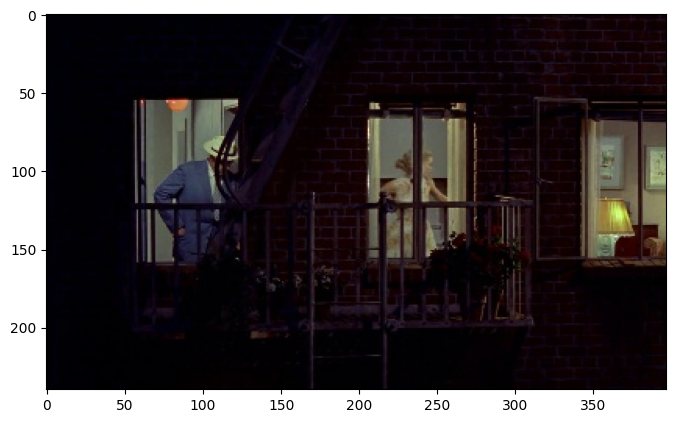

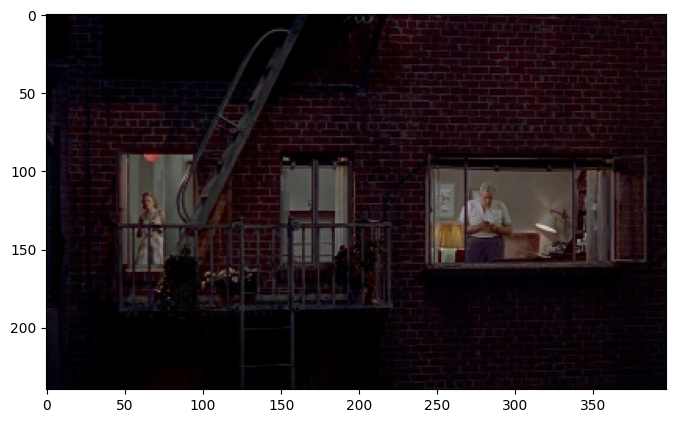

sim_train_img_desc [' Raymond picked up the note. ', ' Through the lens, he sees one of his neighbours in an apartment in the opposite building. ', ' Raymond picked up the note. ', " But what is he taking photos of? All he and Thelma really see are Raymond, a well-groomed, middle-aged man man the apartment across from James' place, while a young woman, whom neither James, nor Thelma know by name, in the apartment to the left appears to get ready to go out for the evening amid open balcony doors due to the sweltering summer heat. ", ' Raymond was busy at his desk working on something strange. ', ' Thelma and James see Raymond in the building across the street. ', ' Through the lens, he sees one of his neighbours in an apartment in the opposite building. ']
val_img_id tt0047396_0668_0
sim_train_img_idx 1567
sim_train_img_id tt0047396_0710_2


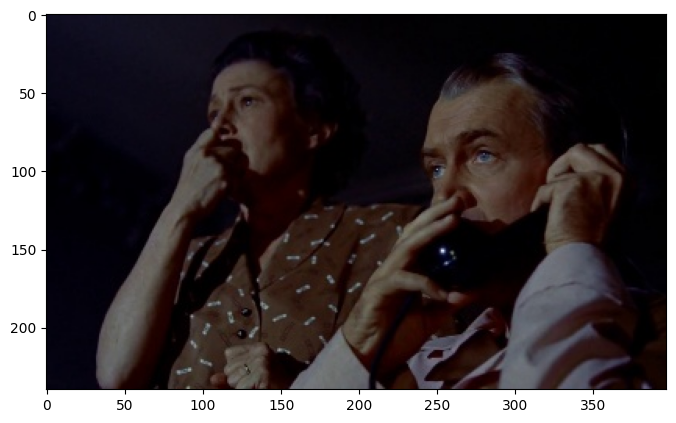

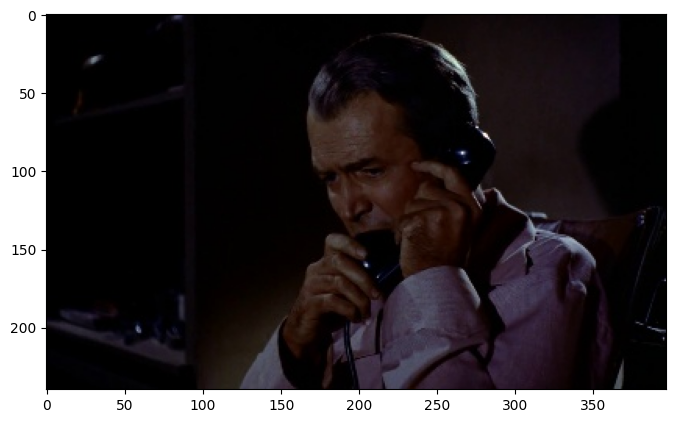

sim_train_img_desc ['Two years ago James was involved in a serious road accident that left him paralyzed. His only son who was living in Los Angeles could not take care of him because he had family commitments and troubles of his own. His son used to call him a couple of times a week to check on him. ', 'James a wheelchair user is woken from his sleep unexpectedly.  After negotiating his way out of bed and into his chair he wheels to the lounge and answers the ringing phone. ', 'James was very worried and he try to order his medicine. ', 'James just got an important phone call. ', 'James picked up the phone as soon as it rang. ']
val_img_id tt0047396_0671_1
sim_train_img_idx 8497
sim_train_img_id tt0047396_0554_0


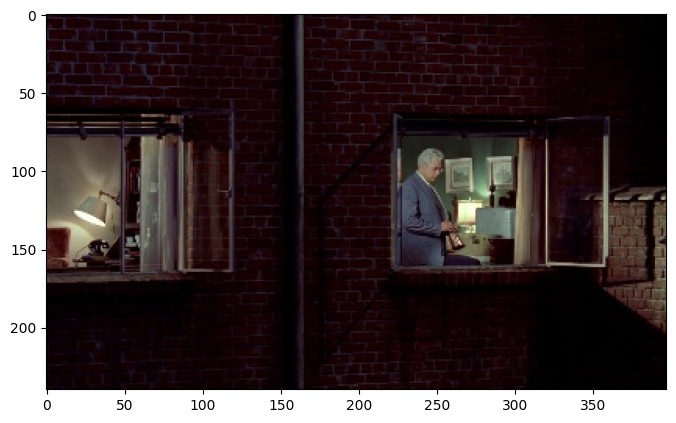

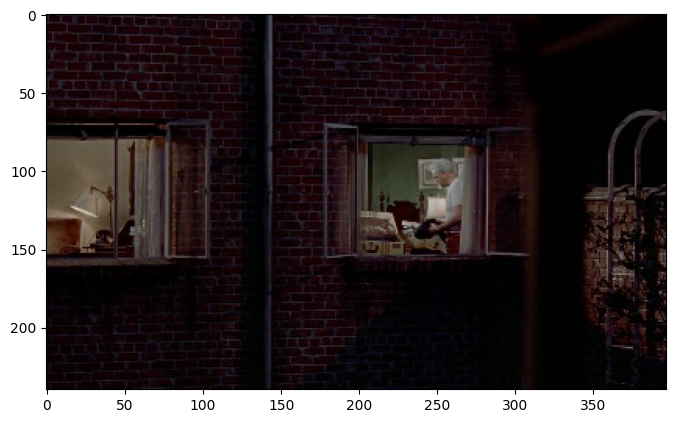

sim_train_img_desc [" They see Raymond in the window and are now convinced James didn't see any crime take place. Raymond is Thelma's brother. ", ' Plus, he saw Raymond leaving his apartment with something big enough to hide a body in. ', ' Raymond can be seen across the street cleaning a lot of blood off of the floor. ', ' He aimed the camera out the window and began taking photos of his neighbor Raymond. He suspected Raymond of stealing one of his shirts from the cleaners, and he wanted proof. ', " They see Raymond in the window and are now convinced James didn't see any crime take place. Raymond is Thelma's brother. ", ' Plus, he saw Raymond leaving his apartment with something big enough to hide a body in. ']
val_img_id tt0047396_0672_0
sim_train_img_idx 1502
sim_train_img_id tt0047396_0639_2


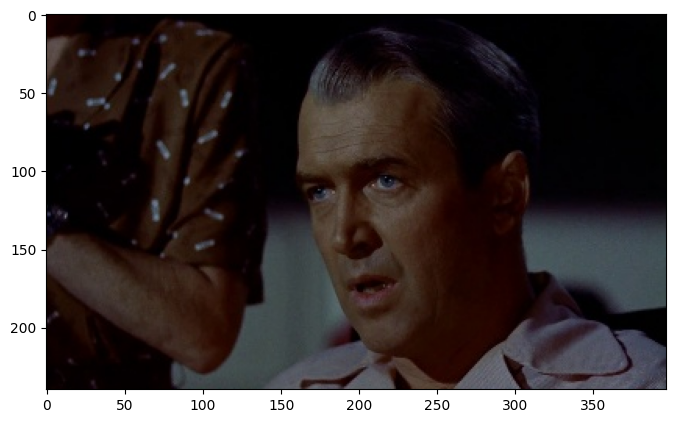

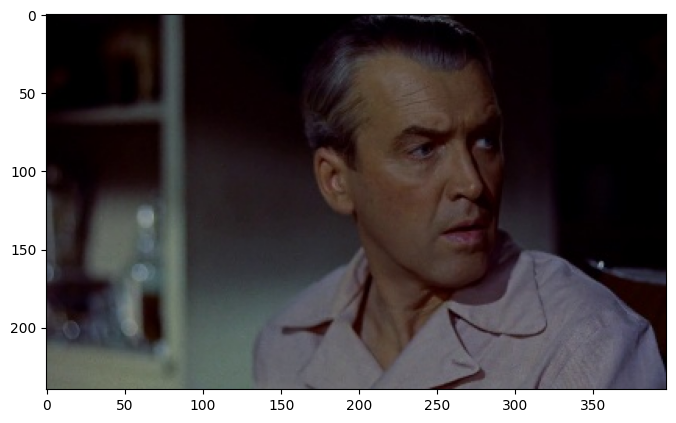

sim_train_img_desc [' James sees the women in his apartment complex walking to the main door. ', ' James watches them. ', ' James turns, hearing the girls running, his expression very concerned. ', 'James was thinking about his new neighbor Grace. She moved into the same building as him and he wanted to get to know her better. ']
val_img_id tt0047396_0693_0
sim_train_img_idx 82
sim_train_img_id tt0119488_1235_1


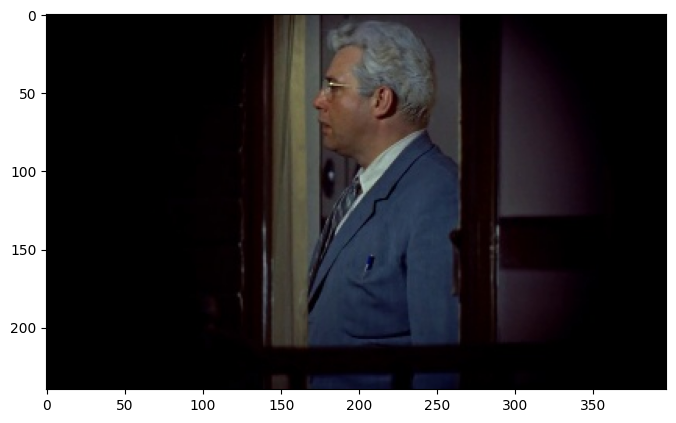

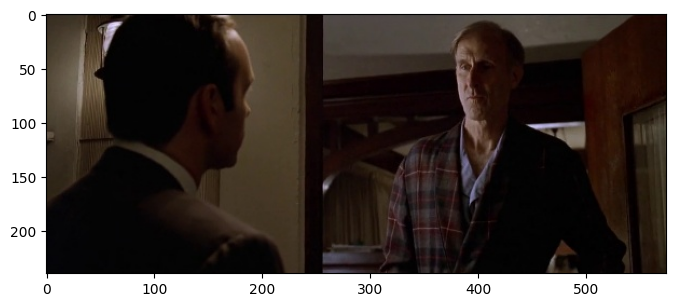

sim_train_img_desc [" Kevin's brother James is there waiting. ", "Agent Kevin knocks on James's door, and Kevin answer it. ", ' James was surprised to see his brother. ', "Kevin comes to James's house and moves in the middle of the night and James is rather adamant to let him in. ", " The most experienced person he knew was his father. He then knocked on the old man's door and quickly answered. "]


In [55]:
val_img_id_li=val_index_img_dic[0]
print(val_img_id_li)

for val_img_id in val_img_id_li:
    val_img_idx=val_f_img_id_dic[val_img_id]
    _train_sim=val_train_sim[val_img_idx]
    sim_train_img_idx=_train_sim.index(max(_train_sim))
    sim_train_img_id=train_f_img_li[sim_train_img_idx]
    # sim_train_img_id=train_img_li[sim_train_img_idx]
    print("val_img_id", val_img_id)
    print("sim_train_img_idx", sim_train_img_idx)
    print("sim_train_img_id", sim_train_img_id)

    sim_train_img_desc=train_img_sent_dic[sim_train_img_id]

    fig = plt.figure(figsize=(8, 8))
    img = Image.open(os.path.join(IMG_PRE_PATH, val_img_id+'.jpg'))
    plt.imshow(img)
    
    fig = plt.figure(figsize=(8, 8))
    img = Image.open(os.path.join(IMG_PRE_PATH, sim_train_img_id+'.jpg'))
    plt.imshow(img)
    plt.show()
    print("sim_train_img_desc", sim_train_img_desc)

['tt0047396_0667_0', 'tt0047396_0668_0', 'tt0047396_0671_1', 'tt0047396_0672_0', 'tt0047396_0693_0']
val_img_id tt0047396_0667_0
sim_train_img_idx 9719
sim_train_img_id tt0047396_0560_0
val_img_id tt0047396_0667_0
val_img.size (397, 240)
sim_train_img_id tt0047396_0560_0
sim_train_img.size (397, 240)


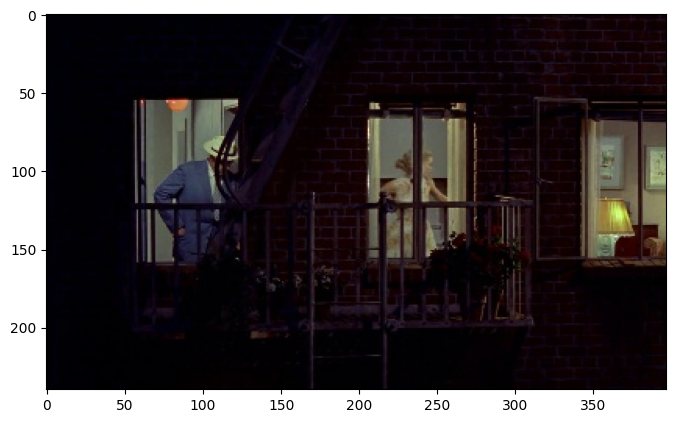

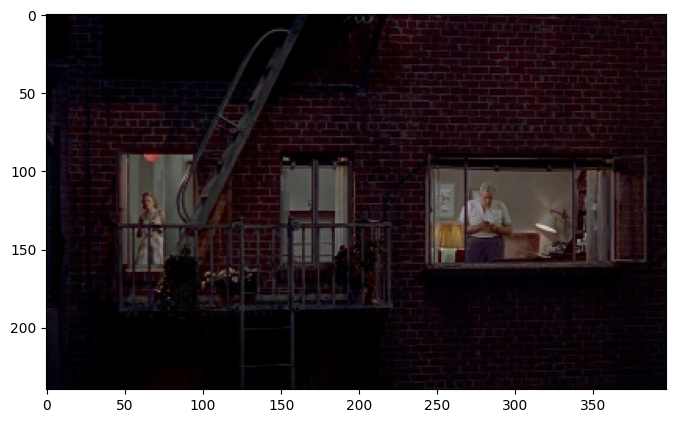

sim_train_img_desc [' Raymond picked up the note. ', ' Through the lens, he sees one of his neighbours in an apartment in the opposite building. ', ' Raymond picked up the note. ', " But what is he taking photos of? All he and Thelma really see are Raymond, a well-groomed, middle-aged man man the apartment across from James' place, while a young woman, whom neither James, nor Thelma know by name, in the apartment to the left appears to get ready to go out for the evening amid open balcony doors due to the sweltering summer heat. ", ' Raymond was busy at his desk working on something strange. ', ' Thelma and James see Raymond in the building across the street. ', ' Through the lens, he sees one of his neighbours in an apartment in the opposite building. ']
val_img_id tt0047396_0668_0
sim_train_img_idx 1567
sim_train_img_id tt0047396_0710_2
val_img_id tt0047396_0668_0
val_img.size (397, 240)
sim_train_img_id tt0047396_0710_2
sim_train_img.size (397, 240)


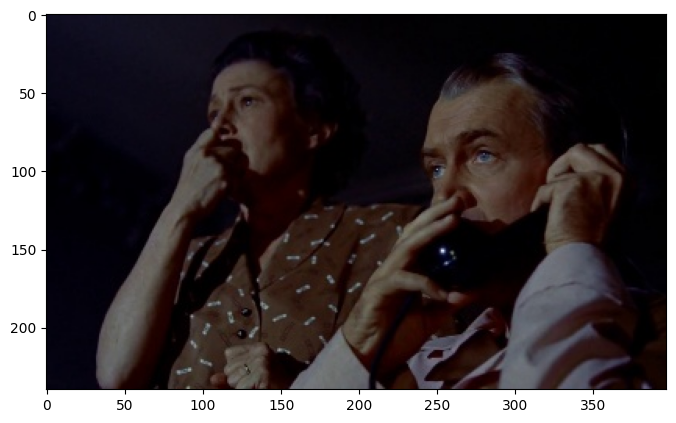

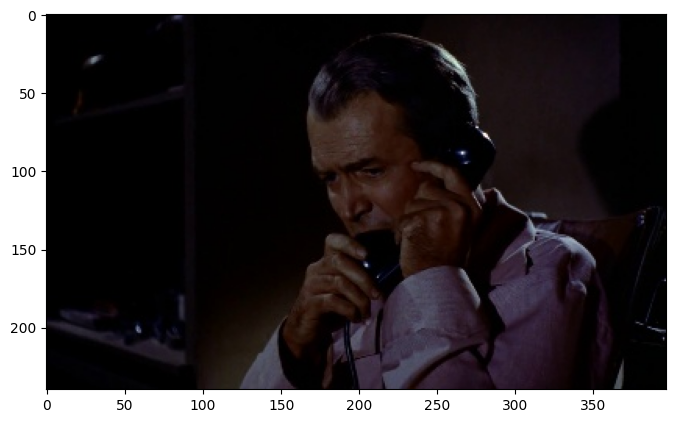

sim_train_img_desc ['Two years ago James was involved in a serious road accident that left him paralyzed. His only son who was living in Los Angeles could not take care of him because he had family commitments and troubles of his own. His son used to call him a couple of times a week to check on him. ', 'James a wheelchair user is woken from his sleep unexpectedly.  After negotiating his way out of bed and into his chair he wheels to the lounge and answers the ringing phone. ', 'James was very worried and he try to order his medicine. ', 'James just got an important phone call. ', 'James picked up the phone as soon as it rang. ']
val_img_id tt0047396_0671_1
sim_train_img_idx 8497
sim_train_img_id tt0047396_0554_0
val_img_id tt0047396_0671_1
val_img.size (397, 240)
sim_train_img_id tt0047396_0554_0
sim_train_img.size (397, 240)


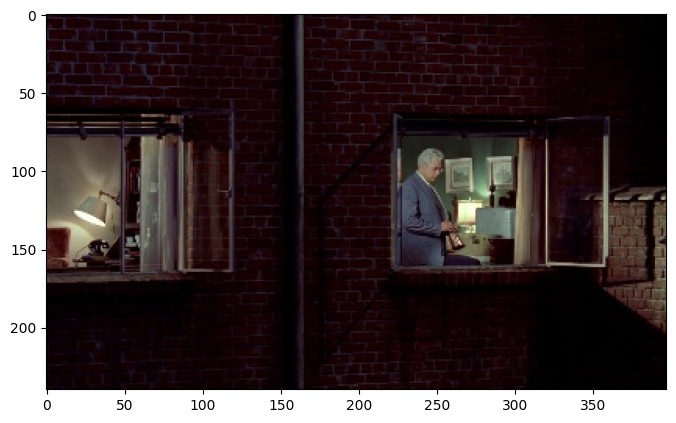

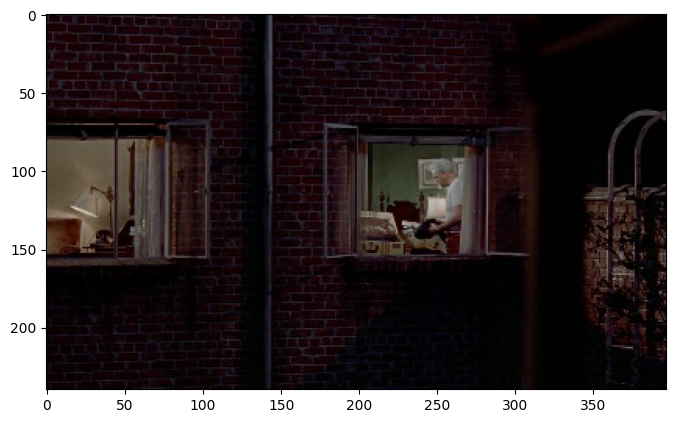

sim_train_img_desc [" They see Raymond in the window and are now convinced James didn't see any crime take place. Raymond is Thelma's brother. ", ' Plus, he saw Raymond leaving his apartment with something big enough to hide a body in. ', ' Raymond can be seen across the street cleaning a lot of blood off of the floor. ', ' He aimed the camera out the window and began taking photos of his neighbor Raymond. He suspected Raymond of stealing one of his shirts from the cleaners, and he wanted proof. ', " They see Raymond in the window and are now convinced James didn't see any crime take place. Raymond is Thelma's brother. ", ' Plus, he saw Raymond leaving his apartment with something big enough to hide a body in. ']
val_img_id tt0047396_0672_0
sim_train_img_idx 1502
sim_train_img_id tt0047396_0639_2
val_img_id tt0047396_0672_0
val_img.size (397, 240)
sim_train_img_id tt0047396_0639_2
sim_train_img.size (397, 240)


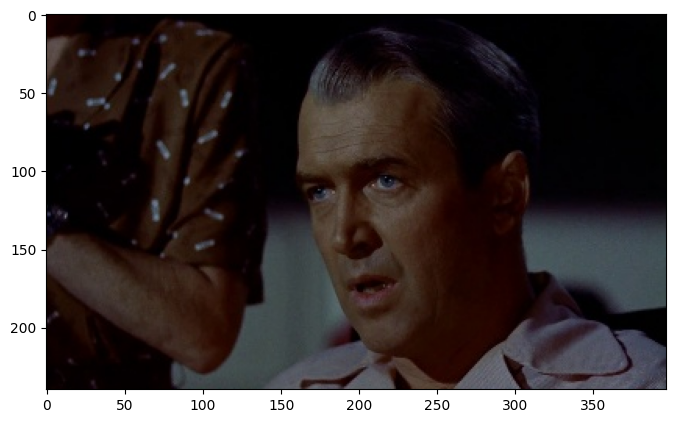

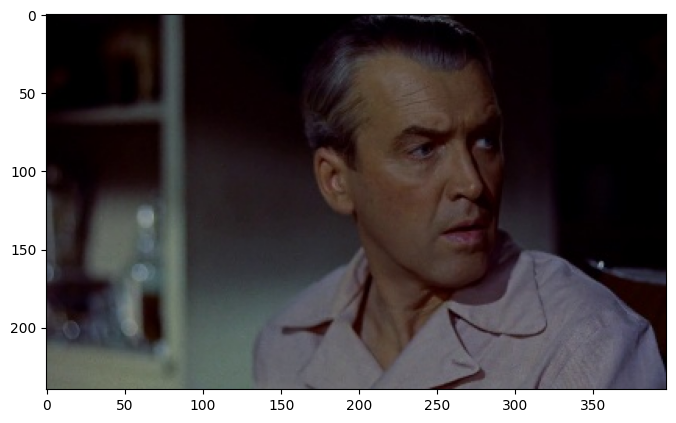

sim_train_img_desc [' James sees the women in his apartment complex walking to the main door. ', ' James watches them. ', ' James turns, hearing the girls running, his expression very concerned. ', 'James was thinking about his new neighbor Grace. She moved into the same building as him and he wanted to get to know her better. ']
val_img_id tt0047396_0693_0
sim_train_img_idx 82
sim_train_img_id tt0119488_1235_1
val_img_id tt0047396_0693_0
val_img.size (397, 240)
sim_train_img_id tt0119488_1235_1
sim_train_img.size (575, 240)


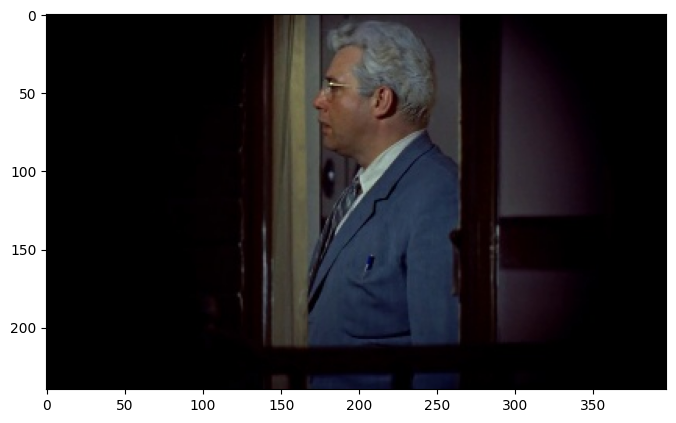

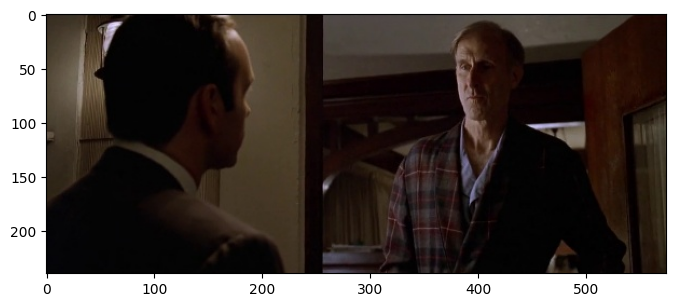

sim_train_img_desc [" Kevin's brother James is there waiting. ", "Agent Kevin knocks on James's door, and Kevin answer it. ", ' James was surprised to see his brother. ', "Kevin comes to James's house and moves in the middle of the night and James is rather adamant to let him in. ", " The most experienced person he knew was his father. He then knocked on the old man's door and quickly answered. "]


In [60]:
val_img_id_li=val_index_img_dic[0]
print(val_img_id_li)

for val_img_id in val_img_id_li:
    val_img_idx=val_f_img_id_dic[val_img_id]
    _train_sim=val_train_sim[val_img_idx]
    sim_train_img_idx=_train_sim.index(max(_train_sim))
    sim_train_img_id=train_f_img_li[sim_train_img_idx]
    # sim_train_img_id=train_img_li[sim_train_img_idx]
    print("val_img_id", val_img_id)
    print("sim_train_img_idx", sim_train_img_idx)
    print("sim_train_img_id", sim_train_img_id)

    sim_train_img_desc=train_img_sent_dic[sim_train_img_id]

    fig = plt.figure(figsize=(8, 8))
    img = Image.open(os.path.join(IMG_PRE_PATH, val_img_id+'.jpg'))
    plt.imshow(img)
    print("val_img_id", val_img_id)
    print("val_img.size", img.size)
    
    fig = plt.figure(figsize=(8, 8))
    img = Image.open(os.path.join(IMG_PRE_PATH, sim_train_img_id+'.jpg'))
    plt.imshow(img)
    print("sim_train_img_id", sim_train_img_id)
    print("sim_train_img.size", img.size)
    
    plt.show()
    print("sim_train_img_desc", sim_train_img_desc)

In [ ]:
print(train_ano_story_li[9073])
img_id_li=train_index_img_dic[9073]
for img_id in img_id_li:
    fig = plt.figure(figsize=(8, 8))
    img = Image.open(os.path.join(IMG_PRE_PATH, img_id+'.jpg'))
    plt.imshow(img)
    
# for img_id in train_index_img_dic[story_id]

[male0] lies on the battlefield bleeding . he wants his comrades to exact revenge on his killer .  the troop , after searching for a week , finally finds [male0] 's killer .  [male1] keeps his sights set on the killer , and aims to get more information out of him . [male2] and [male3] stand next to him to back him up , ready for anything to happen .  after getting information from [male0] 's killer , [male4] and his troop raids the enemy camp . he is the leader of the raid .  the leader of the enemy camp admits that [male0] 's killer has nothing to do with them . the troop radios back to the [male3] , who is keeping [male0] 's killer hostage at the moment .  outraged that [male0] 's killer would lie to them , the troop drags him off to be a prisoner of war . 
img_id tt0120815_0828_1
img.size (443, 240) <class 'tuple'>
img_id tt0120815_0834_1
img.size (443, 240) <class 'tuple'>
img_id tt0120815_0835_2
img.size (443, 240) <class 'tuple'>
img_id tt0120815_0836_0
img.size (443, 240) <class

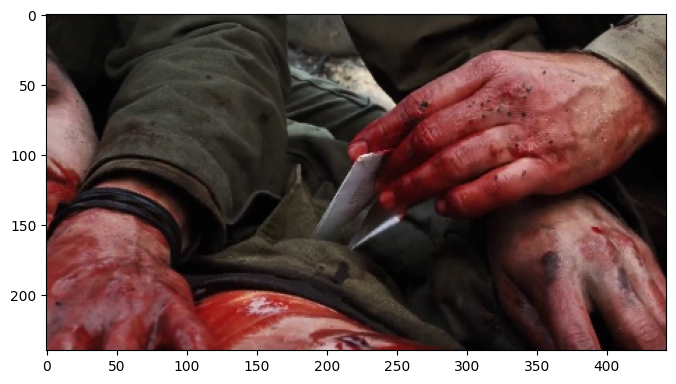

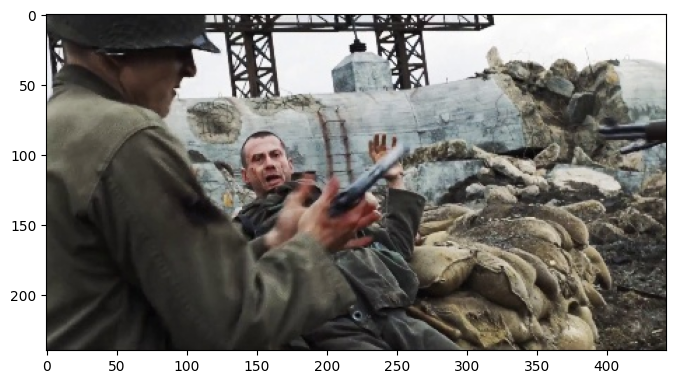

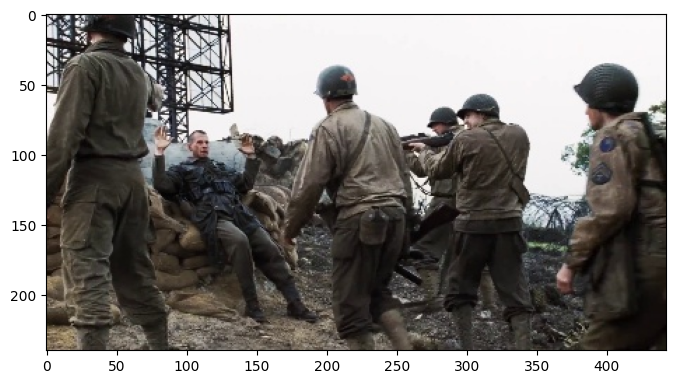

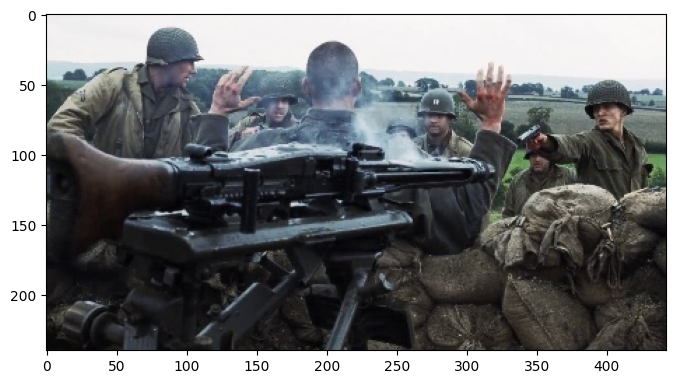

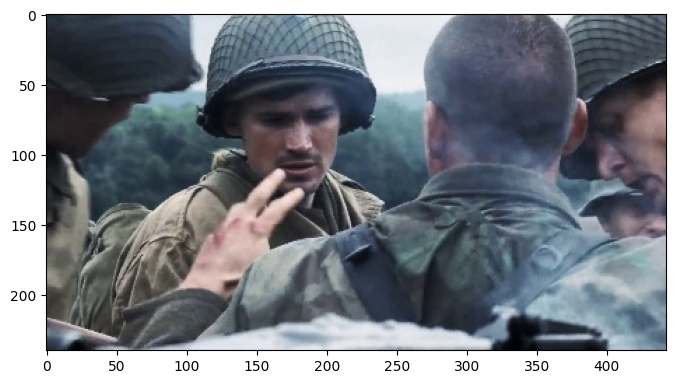

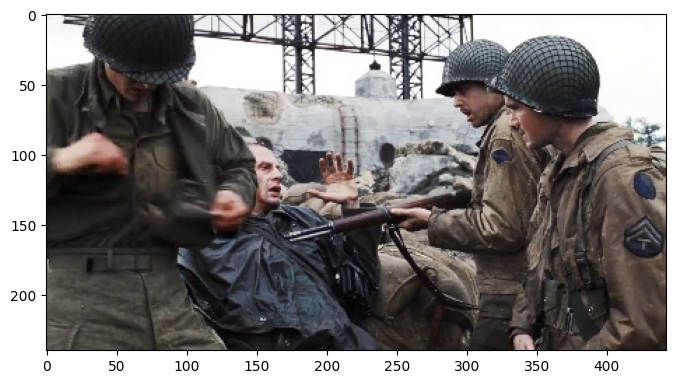

In [59]:
print(val_ano_story_li[495])
img_id_li=val_index_img_dic[495]
for img_id in img_id_li:
    fig = plt.figure(figsize=(8, 8))
    img = Image.open(os.path.join(IMG_PRE_PATH, img_id+'.jpg'))
    print("img_id", img_id)
    print("img.size", img.size, type(img.size))
    plt.imshow(img)
    
# for img_id in train_index_img_dic[story_id]

In [52]:
cos = torch.nn.CosineSimilarity(dim=0)
gen_desc="""A nighttime view of a brick apartment building with a woman and a man standing by the windows and a fire escape.
A concerned man speaks on the phone while a worried woman stands beside him, both appearing anxious.
One window shows a man holding a drink; the adjacent window reveals an unused desk and lamp.
A man with grey hair and a serious expression is accompanied by a person in a patterned shirt.
An older man with gray hair and glasses stands in profile, wearing a blue suit and tie, indoors.
"""
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
gen_desc_embed=tokenizer.encode(gen_desc)
gen_desc_pad=torch.nn.functional.pad(torch.Tensor(gen_desc_embed), \
                                                       (0, 768-len(gen_desc_embed)))

print(cos(gen_desc_pad, train_ano_embed_story_li[9073]))
print(train_ano_story_li[9073])

tensor(0.5014)
[female0] was on her way out of town , but she wanted to ask [female1] for a favor . she asked her to call her mother for her .  [female0] then got on the yellow van .  [female2] went off to do what [female0] asked of her .  she found a pay phone and started to dial .  luckily , she got in touch with [female0] 's mom and told her [female0] was on her way to her . 


In [41]:
print("hello")

hello


In [63]:
train_story_li[10828]
# train_data[10828]['story']

'Geoffrey looks through the bars on the door as if in disbelief. Michael is sitting at a table with a candle on it and a man standing across the table. Outside a mini-riot has broken out and a fire has started. Joaquin comes to the edge of the balcony to see why everyone is running outside. With the front doors open a lady screams toward them....She sees something that disturbs her. '